# Fraud Detection kaggle competition

### Using PySpark

#### Author: Alfonso D'Amelio

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('creditcard.csv', header = True, inferSchema = True)
df.printSchema()
cols=df.columns

root
 |-- Time: decimal(10,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double

In [3]:
df.describe().toPandas()

,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,284807,284807,284807,284807,284807,284807,284807,284807,284807,...,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
1,mean,94813.8596,5.1093952144318264E-17,2.554697607215913E-16,-8.634877912389787E-15,3.5254826979579603E-15,2.0437580857727305E-15,2.088465293899009E-15,-2.2864543584582423E-15,-3.5765766501022783E-16,...,2.554697607215913E-16,8.941441625255696E-16,7.664092821647739E-16,4.515428020754126E-15,1.5455920523656276E-15,1.737194372906821E-15,-3.5456408587648983E-16,-1.311278381203793E-16,88.3496192509508,0.001727485630620034
2,stddev,47488.145954566906,1.9586958038574882,1.651308579476995,1.5162550051777774,1.4158685749409223,1.3802467340314277,1.3322710897575698,1.2370935981826607,1.1943529026691984,...,0.7345240143713111,0.7257015604409144,0.6244602955949919,0.605647067827159,0.5212780705409377,0.48222701326105777,0.4036324949650308,0.33008326416025036,250.12010924018736,0.04152718963546528
3,min,0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,...,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0
4,max,172792,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,...,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1


In [4]:
df.describe('Amount').toPandas()

,summary,Amount
0,count,284807
1,mean,88.3496192509508
2,stddev,250.12010924018736
3,min,0.0
4,max,25691.16


In [5]:
df.describe('Time').toPandas()

,summary,Time
0,count,284807
1,mean,94813.8596
2,stddev,47488.145954566906
3,min,0
4,max,172792


**Let's see if the dataset is balanced**

In [6]:
df.groupBy('Class').count().show()

+-----+------+
|Class| count|
+-----+------+
|    1|   492|
|    0|284315|
+-----+------+



As we expected, most of the transactions belong to the class 0 (not fraudulent):

The percentage of "*Not Fraud*" in the data available is roughly equals to $99,8\%$

* For sure, we will need Oversampling technique to reduce overfitting and underfitting

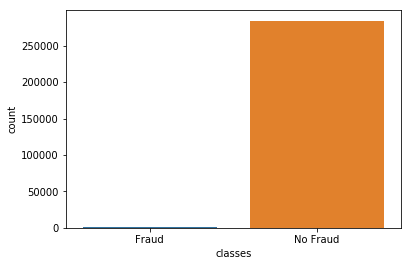

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
label_class=df.groupBy('Class').count().toPandas()
sns.barplot(x=['Fraud','No Fraud',],y=label_class['count'])
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

#### After a bit of statistics and visualization, let's start our **ML analysis**

In [11]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
import pandas as pd

In [12]:
df.select('Amount').show()

+------+
|Amount|
+------+
|149.62|
|  2.69|
|378.66|
| 123.5|
| 69.99|
|  3.67|
|  4.99|
|  40.8|
|  93.2|
|  3.68|
|   7.8|
|  9.99|
| 121.5|
|  27.5|
|  58.8|
| 15.99|
| 12.99|
|  0.89|
|  46.8|
|   5.0|
+------+
only showing top 20 rows



In [13]:
amt_assembler = VectorAssembler(inputCols = ['Amount'],outputCol = "vec_Amount")
data = amt_assembler.transform(df)

In [14]:
data.printSchema()

root
 |-- Time: decimal(10,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double

In [15]:
data = data.withColumnRenamed("Class", "label")
data.select('vec_Amount').show()

+----------+
|vec_Amount|
+----------+
|  [149.62]|
|    [2.69]|
|  [378.66]|
|   [123.5]|
|   [69.99]|
|    [3.67]|
|    [4.99]|
|    [40.8]|
|    [93.2]|
|    [3.68]|
|     [7.8]|
|    [9.99]|
|   [121.5]|
|    [27.5]|
|    [58.8]|
|   [15.99]|
|   [12.99]|
|    [0.89]|
|    [46.8]|
|     [5.0]|
+----------+
only showing top 20 rows



**Standardization 'Amount' class**

In [16]:
standardizer = StandardScaler(withMean=True,withStd=True,inputCol='vec_Amount',outputCol='std_Amount')
model = standardizer.fit(data)
data = model.transform(data)

In [17]:
data.select('std_Amount').show()

+--------------------+
|          std_Amount|
+--------------------+
|[0.24496383331670...|
|[-0.3424739398649...|
|[1.1606838875569376]|
|[0.14053400526590...|
|[-0.0734032113879...|
|[-0.3385558222734...|
|[-0.3332783577624...|
|[-0.1901071425059...|
|[0.01939220626363...|
|[-0.3385158414816...|
|[-0.3220437552807...|
|[-0.3132879618874...|
|[0.13253784691591...|
|[-0.2432815955333...|
|[-0.1181417173560...|
|[-0.2892994868375...|
|[-0.3012937243624...|
|[-0.349670482379903]|
|[-0.1661186674560...|
|[-0.3332383769706...|
+--------------------+
only showing top 20 rows



**Now let's fit *VectorAssembler* we will vectorize the feature set.**

Of course on the columns we needed.

In [18]:
sel_cols =['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','std_Amount']
assembler = VectorAssembler(inputCols = sel_cols,outputCol = "features_vectorize")
data = assembler.transform(data)

In [19]:
pd.DataFrame(data.take(5),columns=data.columns)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,label,vec_Amount,std_Amount,features_vectorize
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,[149.62],[0.24496383331670152],"[-1.3598071336738, -0.0727811733098497, 2.5363..."
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,[2.69],[-0.3424739398649169],"[1.19185711131486, 0.26615071205963, 0.1664801..."
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,[378.66],[1.1606838875569376],"[-1.35835406159823, -1.34016307473609, 1.77320..."
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,[123.5],[0.14053400526590268],"[-0.966271711572087, -0.185226008082898, 1.792..."
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,[69.99],[-0.07340321138793524],"[-1.15823309349523, 0.877736754848451, 1.54871..."


**Let's split the data and train a first simple classifier...**
* **Hold-out** Train $80\%$ and Test $20\%$
* Fit **Decision tree** 
* evaluate with **AUC-ROC** curve scores

In [20]:
train, test = data.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 227649
Test Dataset Count: 57158


Plot the distribution of the label class:

In [21]:
train_label=train.groupBy('label').count().toPandas()
test_label=test.groupBy('label').count().toPandas()

In [35]:
items1=[i for i in train_label['count'].values]
items2=[i for i in test_label['count'].values]
items=items1+items2

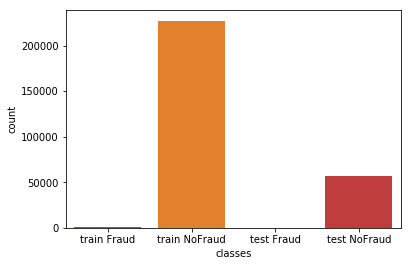

In [23]:
classes=['train Fraud',"train NoFraud","test Fraud","test NoFraud"]
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=classes,y=items)
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [24]:
from pyspark.ml.classification import DecisionTreeClassifier

Dt = DecisionTreeClassifier(featuresCol = 'features_vectorize', labelCol = 'label')
DtModel = Dt.fit(train)

In [25]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = DtModel.transform(test)

In [26]:
selected = predictions.select("label")

In [31]:
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions),{evaluator.metricName: "areaUnderROC"})

Test Area Under ROC 0.7157698507022006 {Param(parent='BinaryClassificationEvaluator_2e208a2811a9', name='metricName', doc='metric name in evaluation (areaUnderROC|areaUnderPR)'): 'areaUnderROC'}


**Let's try  Logistic Regression wich is more strong robust to class imbalance**

In [47]:
from pyspark.ml.classification import LogisticRegression

Lr = LogisticRegression(featuresCol = 'features_vectorize', labelCol = 'label')
LrModel = Lr.fit(train)

from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = LrModel.transform(test)

selected = predictions.select("label")

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions),{evaluator.metricName: "areaUnderROC"})

Test Area Under ROC 0.9673413455351312 {Param(parent='BinaryClassificationEvaluator_807b946af9de', name='metricName', doc='metric name in evaluation (areaUnderROC|areaUnderPR)'): 'areaUnderROC'}


Just a bit of improvement...

At this point using Logistic Regression we could use a **class-weights**, useful to weight the result.

In [42]:
BalancingRatio= (405/227649)
print('BalancingRatio of the class "Fraud" in the Train = {}'.format(BalancingRatio))
print('BalancingRatio of the class "NoFraud" in the Train = {}'.format(1-BalancingRatio))

BalancingRatio of the class "Fraud" in the Train = 0.001779054597208861
BalancingRatio of the class "NoFraud" in the Train = 0.9982209454027912


**Apply class-weights**

In [46]:
from pyspark.sql.functions import col, expr, when

train=train.withColumn("classWeights", when(train.label == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(10)

+------------------+
|      classWeights|
+------------------+
|0.9982209454027912|
|0.9982209454027912|
|0.9982209454027912|
|0.9982209454027912|
|0.9982209454027912|
|0.9982209454027912|
|0.9982209454027912|
|0.9982209454027912|
|0.9982209454027912|
|0.9982209454027912|
+------------------+
only showing top 10 rows



In [48]:
from pyspark.ml.classification import LogisticRegression

Lr_weight = LogisticRegression(featuresCol = 'features_vectorize', labelCol = 'label',weightCol="classWeights")
LrModel_weight = Lr_weight.fit(train)

from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = LrModel_weight.transform(test)

selected = predictions.select("label")

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions),{evaluator.metricName: "areaUnderROC"})

Test Area Under ROC 0.9375508667665777 {Param(parent='BinaryClassificationEvaluator_4702dac74544', name='metricName', doc='metric name in evaluation (areaUnderROC|areaUnderPR)'): 'areaUnderROC'}


In [49]:
print('Test Area Under ROC', evaluator.evaluate(predictions),{evaluator.metricName: "areaUnderPR"})

Test Area Under ROC 0.9375508667666195 {Param(parent='BinaryClassificationEvaluator_4702dac74544', name='metricName', doc='metric name in evaluation (areaUnderROC|areaUnderPR)'): 'areaUnderPR'}


**In the end let's improve the results using Cross Validation**

In [51]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = ParamGridBuilder()\
    .addGrid(Lr_weight.aggregationDepth,[2,5,10])\
    .addGrid(Lr_weight.elasticNetParam,[0.0, 0.5, 1.0])\
    .addGrid(Lr_weight.fitIntercept,[False, True])\
    .addGrid(Lr_weight.maxIter,[10, 100, 1000])\
    .addGrid(Lr_weight.regParam,[0.01, 0.5, 2.0]) \
    .build()

In [53]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=Lr_weight, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations
cvModel = cv.fit(train)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing
predict_train=cvModel.transform(train)
predict_test=cvModel.transform(test)
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set after CV  is 0.9726635491171539
The area under ROC for test set after CV  is 0.9616452746801467


**We got a really good results**:
* AUC- ROC for test set after CV  is $96\%$